In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
import imblearn
warnings.filterwarnings('ignore')

%matplotlib inline

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv("./Data/df_clean.csv",index_col=0)
df

,daya_baterai,px_panjang,px_lebar,berat_hp,tebal_hp,kapasitas_ram,jumlah_prosesor,price_range,bluetooth_0,bluetooth_1
1,764,361,511,152,1.0,3148,8,2,0,1
2,1812,380,1550,162,1.0,3338,7,3,0,1
6,1671,398,1263,179,0.9,815,8,0,1,0
7,852,538,730,147,0.4,1275,5,0,0,1
10,1027,1698,1747,103,0.9,3786,2,3,1,0
...,...,...,...,...,...,...,...,...,...,...
1495,1224,522,563,157,1.0,3796,1,3,0,1
1496,1158,311,1796,123,0.7,1542,2,1,1,0
1497,1190,1399,1646,93,0.2,3610,5,3,1,0
1498,1191,179,1813,169,0.9,1028,1,0,1,0


In [3]:
x = df.drop(columns="price_range")
y = df["price_range"]

x_train,x_test,y_train,y_test = train_test_split(x,y,stratify=y,test_size=.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((653, 9), (164, 9), (653,), (164,))

# BASE MODEL 

    Pada proses machine leaarning ini akan dibandingkan nilai evaluasi matrix(f1 score) untuk 4 algoritma :
    1. Logistic Regression
    2. Random Forest
    3. Extreme Gradient Boosting
    4. Support Vector Machine

## Logistic Regression

In [4]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
y_LR_train = LR.predict(x_train)
y_LR_test = LR.predict(x_test)
f1_LR_train = f1_score(y_train,y_LR_train,average="weighted")
f1_LR_test = f1_score(y_test,y_LR_test,average="weighted")

status_LR = []
print(f"Nilai F1 Score Logistic Regression : \n train : {f1_LR_train} \n test : {f1_LR_test} ")
if (f1_LR_train-f1_LR_test) > 0.03 :
    print("Overfitting")
    status_LR.append("Overfitting")
elif (f1_LR_train-f1_LR_test) < -0.03 :
    print("UnderFitting") 
    status_LR.append("Underfitting")
else :
    print("Just Right")
    status_LR.append("Just Right")

Nilai F1 Score Logistic Regression : 
 train : 0.6205440490851063 
 test : 0.6056703317480403 
Just Right


In [5]:
cm_LR = confusion_matrix(y_test,y_LR_test,labels=[3,2,1,0])
df_cm_LR = pd.DataFrame(data=cm_LR,columns=["Pred3","Pred_2","Pred_1","Pred_0"],index=["Aktual_3","Aktual_2","Aktual_1","Aktual_0"])
df_cm_LR

,Pred3,Pred_2,Pred_1,Pred_0
Aktual_3,24,14,1,0
Aktual_2,14,19,9,0
Aktual_1,3,10,21,6
Aktual_0,0,1,7,35


## Logistic Regression Scaled
    Dilakukan scaling agar proporsi untuk setiap featurenya seimbang

In [6]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [7]:
LR_scaled = LogisticRegression()
LR_scaled.fit(x_train_scaled,y_train)
y_LR_train_scaled = LR_scaled.predict(x_train_scaled)
y_LR_test_scaled = LR_scaled.predict(x_test_scaled)
f1_LR_train_scaled = f1_score(y_train,y_LR_train_scaled,average="weighted")
f1_LR_test_scaled = f1_score(y_test,y_LR_test_scaled,average="weighted")

status_LR_scaled = []
print(f"Nilai F1 Score Logistic Regression Scaled: \n train : {f1_LR_train_scaled} \n test : {f1_LR_test_scaled} ")
if (f1_LR_train_scaled-f1_LR_test_scaled) > 0.03 :
    print("Overfitting")
    status_LR_scaled.append("Overfitting")
elif (f1_LR_train_scaled-f1_LR_test_scaled) < -0.03 :
    print("UnderFitting") 
    status_LR_scaled.append("Underfitting")
else :
    print("Just Right")
    status_LR_scaled.append("Just Right")

Nilai F1 Score Logistic Regression Scaled: 
 train : 0.9662444419615737 
 test : 0.9384809084726871 
Just Right


In [8]:
cm_LR_scaled = confusion_matrix(y_test,y_LR_test_scaled,labels=[3,2,1,0])
df_cm_LR_scaled = pd.DataFrame(data=cm_LR_scaled,columns=["Pred3","Pred_2","Pred_1","Pred_0"],index=["Aktual_3","Aktual_2","Aktual_1","Aktual_0"])
df_cm_LR_scaled

,Pred3,Pred_2,Pred_1,Pred_0
Aktual_3,39,0,0,0
Aktual_2,3,38,1,0
Aktual_1,0,1,35,4
Aktual_0,0,0,1,42


    Untuk model Logistic Regression menghasilkan hasil evaluasi matrix f1-score cukup signifikan. Kalau dilihat dari confusion matrix juga terlihat jelas bahwa pada saat dilakukan scaling, hasil False negative dan false positivenya menurun, sehingga wajar apabila f1-score dan accuracynya meningkat. Karena pada problem ini fokus untuk menurunkan false negative dan false positivenya, jadi bertujuan untuk meminimalisir tebakan salah, sehingga dapat menghasilkan model yang bisa menebak secara tepat dengan error yang kecil. Maka dari itu fokusnya adalah pada nilai f1-score( accuracy juga bisa menjadi pilihan)

## Random Forest

In [9]:
RF = RandomForestClassifier()
RF.fit(x_train,y_train)
y_RF_train = RF.predict(x_train)
y_RF_test = RF.predict(x_test)
f1_RF_train = f1_score(y_train,y_RF_train,average="weighted")
f1_RF_test = f1_score(y_test,y_RF_test,average="weighted")

status_RF = []
print(f"Nilai F1 Random Forest: \n train : {f1_RF_train} \n test : {f1_RF_test} ")
if (f1_RF_train-f1_RF_test) > 0.03 :
    print("Overfitting")
    status_RF.append("Overfitting")
elif (f1_RF_train-f1_RF_test) < -0.03 :
    print("UnderFitting")
    status_RF.append("Underfitting")
else :
    print("Just Right")
    status_RF.append("Just Right")

Nilai F1 Random Forest: 
 train : 1.0 
 test : 0.827814058663512 
Overfitting


In [10]:
cm_RF = confusion_matrix(y_test,y_RF_test,labels=[3,2,1,0])
df_cm_RF = pd.DataFrame(data=cm_RF,columns=["Pred3","Pred_2","Pred_1","Pred_0"],index=["Aktual_3","Aktual_2","Aktual_1","Aktual_0"])
df_cm_RF

,Pred3,Pred_2,Pred_1,Pred_0
Aktual_3,33,6,0,0
Aktual_2,3,34,5,0
Aktual_1,0,5,28,7
Aktual_0,0,0,2,41


## Extreme Gradient Boosting

In [11]:
XGB = XGBClassifier()
XGB.fit(x_train,y_train)
y_XGB_train = XGB.predict(x_train)
y_XGB_test = XGB.predict(x_test)
f1_XGB_train = f1_score(y_train,y_XGB_train,average="weighted")
f1_XGB_test = f1_score(y_test,y_XGB_test,average="weighted")

status_XGB = []
print(f"Nilai F1 Extreme Gradient Boosting : \n train : {f1_XGB_train} \n test : {f1_XGB_test} ")
if (f1_XGB_train-f1_XGB_test) > 0.03 :
    print("Overfitting")
    status_XGB.append("Overfitting")
elif (f1_XGB_train-f1_XGB_test) < -0.03 :
    print("UnderFitting") 
    status_XGB.append("Underfitting")
else :
    print("Just Right")
    status_XGB.append("Just Right")

Nilai F1 Extreme Gradient Boosting : 
 train : 1.0 
 test : 0.8469195090015863 
Overfitting


In [12]:
cm_XGB = confusion_matrix(y_test,y_XGB_test,labels=[3,2,1,0])
df_cm_XGB = pd.DataFrame(data=cm_XGB,columns=["Pred3","Pred_2","Pred_1","Pred_0"],index=["Aktual_3","Aktual_2","Aktual_1","Aktual_0"])
df_cm_XGB

,Pred3,Pred_2,Pred_1,Pred_0
Aktual_3,34,5,0,0
Aktual_2,4,35,3,0
Aktual_1,0,7,29,4
Aktual_0,0,0,2,41


## Support Vector Machine

In [13]:
SVM = SVC()
SVM.fit(x_train,y_train)
y_SVM_train = SVM.predict(x_train)
y_SVM_test = SVM.predict(x_test)
f1_SVM_train = f1_score(y_train,y_SVM_train,average="weighted")
f1_SVM_test = f1_score(y_test,y_SVM_test,average="weighted")

status_SVM = []
print(f"Nilai F1 Score Support Vector Machine : \n train : {f1_SVM_train} \n test : {f1_SVM_test} ")
if (f1_SVM_train-f1_SVM_test) > 0.03 :
    print("Overfitting")
    status_SVM.append("Overfitting")
elif (f1_SVM_train-f1_SVM_test) < -0.03 :
    print("UnderFitting") 
    status_SVM.append("Underfitting")
else :
    print("Just Right")
    status_SVM.append("Just Right")

Nilai F1 Score Support Vector Machine : 
 train : 0.9495549495570389 
 test : 0.91453134621205 
Overfitting


In [14]:
cm_SVM = confusion_matrix(y_test,y_SVM_test,labels=[3,2,1,0])
df_cm_SVM = pd.DataFrame(data=cm_SVM,columns=["Pred3","Pred_2","Pred_1","Pred_0"],index=["Aktual_3","Aktual_2","Aktual_1","Aktual_0"])
df_cm_SVM

,Pred3,Pred_2,Pred_1,Pred_0
Aktual_3,36,3,0,0
Aktual_2,1,37,4,0
Aktual_1,0,0,35,5
Aktual_0,0,0,1,42


## Support Vector Machine Scaled

In [15]:
SVM_scaled = SVC()
SVM_scaled.fit(x_train_scaled,y_train)
y_SVM_train_scaled = SVM_scaled.predict(x_train_scaled)
y_SVM_test_scaled = SVM_scaled.predict(x_test_scaled)
f1_SVM_train_scaled = f1_score(y_train,y_SVM_train_scaled,average="weighted")
f1_SVM_test_scaled = f1_score(y_test,y_SVM_test_scaled,average="weighted")

status_SVM_scaled = []
print(f"Nilai F1 Score Support Vector Machine Scaled: \n train : {f1_SVM_train_scaled} \n test : {f1_SVM_test_scaled} ")
if (f1_SVM_train_scaled-f1_SVM_test_scaled) > 0.03 :
    print("Overfitting")
    status_SVM_scaled.append("Overfitting")
elif (f1_SVM_train_scaled-f1_SVM_test_scaled) < -0.03 :
    print("UnderFitting") 
    status_SVM_scaled.append("Underfitting")
else :
    print("Just Right")
    status_SVM_scaled.append("Just Right")

Nilai F1 Score Support Vector Machine Scaled: 
 train : 0.9557094463871003 
 test : 0.8594956923890589 
Overfitting


In [16]:
cm_SVM_scaled = confusion_matrix(y_test,y_SVM_test_scaled,labels=[3,2,1,0])
df_cm_SVM_scaled = pd.DataFrame(data=cm_SVM_scaled,columns=["Pred3","Pred_2","Pred_1","Pred_0"],index=["Aktual_3","Aktual_2","Aktual_1","Aktual_0"])
df_cm_SVM_scaled

,Pred3,Pred_2,Pred_1,Pred_0
Aktual_3,34,5,0,0
Aktual_2,2,38,2,0
Aktual_1,0,9,28,3
Aktual_0,0,0,2,41


In [17]:
basemodel_score = {
    "Logistic Regression" : [f1_LR_test,status_LR[0]],
    "Logistic Regression Scaled" : [f1_LR_test_scaled,status_LR_scaled[0]],
    "Random Forest" : [f1_RF_test,status_RF[0]],
    "Extreme Gradient Boosting" : [f1_XGB_test,status_XGB[0]],
    "Support Vector Machine" : [f1_SVM_test,status_SVM[0]],
    "Support Vector Machine Scaled" : [f1_SVM_test_scaled,status_SVM_scaled[0]]
}
pd.DataFrame(data = basemodel_score,index=["F1 Score","Status"]).T

,F1 Score,Status
Logistic Regression,0.60567,Just Right
Logistic Regression Scaled,0.938481,Just Right
Random Forest,0.827814,Overfitting
Extreme Gradient Boosting,0.84692,Overfitting
Support Vector Machine,0.914531,Overfitting
Support Vector Machine Scaled,0.859496,Overfitting


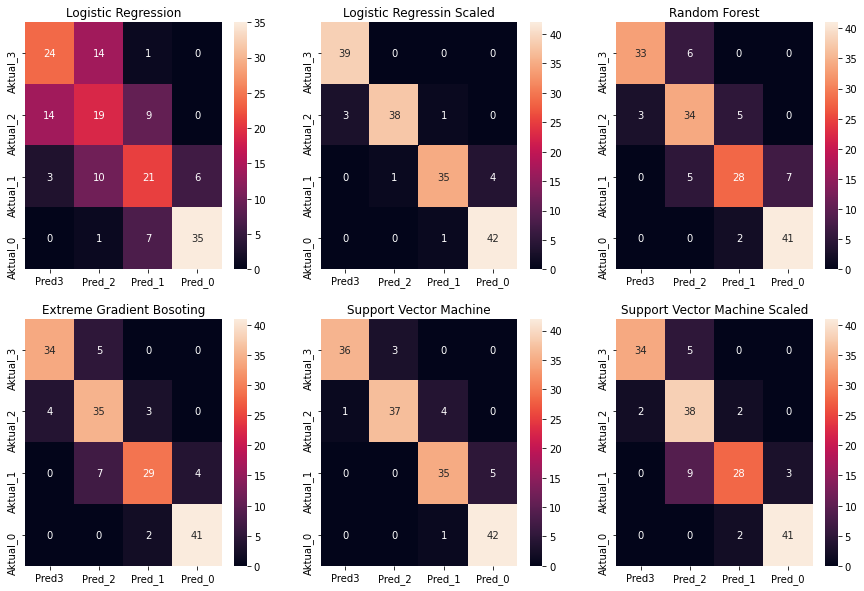

In [18]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.heatmap(df_cm_LR,annot=True)
plt.title("Logistic Regression")

plt.subplot(2,3,2)
sns.heatmap(df_cm_LR_scaled,annot=True)
plt.title("Logistic Regressin Scaled")


plt.subplot(2,3,3)
sns.heatmap(df_cm_RF,annot=True)
plt.title("Random Forest")


plt.subplot(2,3,4)
sns.heatmap(df_cm_XGB,annot=True)
plt.title("Extreme Gradient Bosoting")

plt.subplot(2,3,5)
sns.heatmap(df_cm_SVM,annot=True)
plt.title("Support Vector Machine")

plt.subplot(2,3,6)
sns.heatmap(df_cm_SVM_scaled,annot=True)
plt.title("Support Vector Machine Scaled")

plt.show()

    Untuk sementara untuk base model, algoritma yang memiliki nilai evaluasi terbaik adalah Logistic Regression yang sudah disertai proses scaling menggunakan Standard Scaler bertujuan agar masing-masing feature memiilki proporsi yang seimbang. Dan model yang dihasilkan juga baik. karena tidak overfitting atapun underfitting.
    Kemudian dilihat dari Confusion Matrix, bisa dikatakan bahwa False Negative dan False Positive pada algoritma Logistic Regression Scaled, memiliki angka paling kecil. Artinya, Pada algoritma tersebut model hanya melakukan sedikit kesalahan pada saat memprediksi price_range sebuah data, dengan kata lain errornya kecil

# ============= HYPER PARAMETER TUNING =============

## Logistic Regression Tuned

In [19]:
LR_tuned = LogisticRegression()
parameter_LR ={
    "penalty" : ["l2"], ##l2
    "tol" : [0.9], #0.1
    "C" : [0.0011], #0.0011
    "solver" : ['lbfgs'], 
    "max_iter" : [10000],
    "class_weight" : ["balanced"],
    "multi_class" : ["auto"]
}
model_LR_tuned = GridSearchCV(estimator = LR_tuned,
                       param_grid= parameter_LR,
                       cv = 5,
                       scoring="f1_macro",
                       n_jobs = -1,
                       verbose=1,
                    )


model_LR_tuned.fit(x_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.4s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.2s finished


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0011], 'class_weight': ['balanced'],
                         'max_iter': [10000], 'multi_class': ['auto'],
                         'penalty': ['l2'], 'solver': ['lbfgs'], 'tol': [0.9]},
             scoring='f1_macro', verbose=1)

In [20]:
LR_tuned = model_LR_tuned.best_estimator_
y_LR_train_tuned = LR_tuned.predict(x_train)
y_LR_test_tuned = LR_tuned.predict(x_test)
f1_LR_train_tuned = f1_score(y_train,y_LR_train_tuned,average="macro")
f1_LR_test_tuned = f1_score(y_test,y_LR_test_tuned,average="macro")

status_LR_tuned = []
print(f"Nilai F1 Score Logistic Regression Tuned : \n train : {f1_LR_train_tuned} \n test : {f1_LR_test_tuned} ")
if (f1_LR_train_tuned-f1_LR_test_tuned) > 0.03 :
    print("Overfitting")
    status_LR_tuned.append("Overfitting")
elif (f1_LR_train_tuned-f1_LR_test_tuned) < -0.03 :
    print("UnderFitting") 
    status_LR_tuned.append("Underfitting")
else :
    print("Just Right")
    status_LR_tuned.append("Just Right")

Nilai F1 Score Logistic Regression Tuned : 
 train : 0.986231888452763 
 test : 0.9635349476484462 
Just Right


In [21]:
cm_LR_tuned = confusion_matrix(y_test,y_LR_test_tuned,labels=[3,2,1,0])
df_cm_LR_tuned = pd.DataFrame(data=cm_LR_tuned,columns=["Pred3","Pred_2","Pred_1","Pred_0"],index=["Aktual_3","Aktual_2","Aktual_1","Aktual_0"])
df_cm_LR_tuned

,Pred3,Pred_2,Pred_1,Pred_0
Aktual_3,38,1,0,0
Aktual_2,1,40,1,0
Aktual_1,0,0,39,1
Aktual_0,0,0,2,41


## Logistic Regiression Tuned Scaled

In [22]:
scaler = RobustScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [23]:
LR_tuned_scaled = LogisticRegression()
parameter_LR_scaled ={
    "penalty" : ["l2"],
    "tol" : [10],
    "C" : [50],
    "solver" : ['lbfgs'],
    "max_iter" : [10000],
    "class_weight" : ["balanced"],
    "multi_class" : ["auto"],
}
model_LR_tuned_scaled = GridSearchCV(estimator = LR_tuned_scaled,
                       param_grid= parameter_LR_scaled,
                       cv = 5,
                       scoring="f1_weighted",
                       n_jobs = -1,
                       verbose=1,
                    )


model_LR_tuned_scaled.fit(x_train_scaled,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [50], 'class_weight': ['balanced'],
                         'max_iter': [10000], 'multi_class': ['auto'],
                         'penalty': ['l2'], 'solver': ['lbfgs'], 'tol': [10]},
             scoring='f1_weighted', verbose=1)

In [24]:
LR_tuned_scaled = model_LR_tuned_scaled.best_estimator_
y_LR_train_tuned_scaled = LR_tuned_scaled.predict(x_train_scaled)
y_LR_test_tuned_scaled = LR_tuned_scaled.predict(x_test_scaled)
f1_LR_train_tuned_scaled = f1_score(y_train,y_LR_train_tuned_scaled,average="weighted")
f1_LR_test_tuned_scaled = f1_score(y_test,y_LR_test_tuned_scaled,average="weighted")

status_LR_tuned_scaled = []
print(f"Nilai F1 Score Logistic Regression Tuned Scaled : \n train : {f1_LR_train_tuned_scaled} \n test : {f1_LR_test_tuned_scaled} ")
if (f1_LR_train_tuned_scaled-f1_LR_test_tuned_scaled) > 0.03 :
    print("Overfitting")
    status_LR_tuned_scaled.append("Overfitting")
elif (f1_LR_train_tuned_scaled-f1_LR_test_tuned_scaled) < -0.03 :
    print("UnderFitting") 
    status_LR_tuned_scaled.append("Underfitting")
else :
    print("Just Right")
    status_LR_tuned_scaled.append("Just Right")

Nilai F1 Score Logistic Regression Tuned Scaled : 
 train : 0.9633971193570139 
 test : 0.9015245179682632 
Overfitting


In [25]:
cm_LR_tuned_scaled = confusion_matrix(y_test,y_LR_test_tuned_scaled,labels=[3,2,1,0])
df_cm_LR_tuned_scaled = pd.DataFrame(data=cm_LR_tuned_scaled,columns=["Pred3","Pred_2","Pred_1","Pred_0"],index=["Aktual_3","Aktual_2","Aktual_1","Aktual_0"])
df_cm_LR_tuned_scaled

,Pred3,Pred_2,Pred_1,Pred_0
Aktual_3,36,3,0,0
Aktual_2,2,36,4,0
Aktual_1,0,0,33,7
Aktual_0,0,0,0,43


## Random Forest Tuned

In [26]:
RF_tuned = RandomForestClassifier()
parameter_RF ={
    "n_estimators" : [500],
    "max_depth" : [100],
    "min_samples_split" : [15],
    "min_samples_leaf" : [1],
    "max_features" : ["auto"]
}
model_RF_tuned = GridSearchCV(estimator = RF_tuned,
                       param_grid= parameter_RF,
                       cv = 5,
                       scoring="f1_weighted",
                       n_jobs = -1,
                       verbose=1,
                    )


model_RF_tuned.fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.4s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [100], 'max_features': ['auto'],
                         'min_samples_leaf': [1], 'min_samples_split': [15],
                         'n_estimators': [500]},
             scoring='f1_weighted', verbose=1)

In [27]:
RF_tuned = model_RF_tuned.best_estimator_
y_RF_train_tuned = RF_tuned.predict(x_train)
y_RF_test_tuned = RF_tuned.predict(x_test)
f1_RF_train_tuned = f1_score(y_train,y_RF_train_tuned,average="weighted")
f1_RF_test_tuned = f1_score(y_test,y_RF_test_tuned,average="weighted")

status_RF_tuned = []
print(f"Nilai F1 Score Random Forest Tuned : \n train : {f1_RF_train_tuned} \n test : {f1_RF_test_tuned} ")
if (f1_RF_train_tuned-f1_RF_test_tuned) > 0.03 :
    print("Overfitting")
    status_RF_tuned.append("Overfitting")
elif (f1_RF_train_tuned-f1_RF_test_tuned) < -0.03 :
    print("UnderFitting") 
    status_RF_tuned.append("Underfitting")
else :
    print("Just Right")
    status_RF_tuned.append("Just Right")

Nilai F1 Score Random Forest Tuned : 
 train : 0.9862077986441039 
 test : 0.8290482359008703 
Overfitting


In [28]:
cm_RF_tuned = confusion_matrix(y_test,y_RF_test_tuned,labels=[3,2,1,0])
df_cm_RF_tuned = pd.DataFrame(data=cm_RF_tuned,columns=["Pred3","Pred_2","Pred_1","Pred_0"],index=["Aktual_3","Aktual_2","Aktual_1","Aktual_0"])
df_cm_RF_tuned

,Pred3,Pred_2,Pred_1,Pred_0
Aktual_3,32,7,0,0
Aktual_2,3,34,5,0
Aktual_1,0,6,29,5
Aktual_0,0,0,2,41


## Extreme Gradient Boosting Tuned

In [29]:
XGB_tuned = XGBClassifier()
parameter_XGB ={
    "n_estimators" : [1000],
    "max_depth" : [50],
    "learning_rate" : [0.001],
    "gamma" : [1],
    "min_child_weight" : [0],
    "colsample_bytree" : [1],
    "colsample_bylevel" : [1],
    "colsample_bynode" : [1],
    "reg_alpha" : [1],
    "reg_lambda" : [1],
    "scale_pos_weight" : [1]  
}
model_XGB_tuned = GridSearchCV(estimator = XGB_tuned,
                       param_grid= parameter_XGB,
                       cv = 5,
                       scoring="f1_weighted",
                       n_jobs = -1,
                       verbose=1,
                    )


model_XGB_tuned.fit(x_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.5s remaining:    6.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.7s finished


[22:24:35] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=None,
                                     verbosity=None),
             n_jobs=-1,
             param_grid={'colsample_bylevel': [1

In [30]:
XGB_tuned = model_XGB_tuned.best_estimator_
y_XGB_train_tuned = XGB_tuned.predict(x_train)
y_XGB_test_tuned = XGB_tuned.predict(x_test)
f1_XGB_train_tuned = f1_score(y_train,y_XGB_train_tuned,average="weighted")
f1_XGB_test_tuned = f1_score(y_test,y_XGB_test_tuned,average="weighted")

status_XGB_tuned = []
print(f"Nilai F1 Score Extreme Gradient Boosting Tuned : \n train : {f1_XGB_train_tuned} \n test : {f1_XGB_test_tuned} ")
if (f1_XGB_train_tuned-f1_XGB_test_tuned) > 0.03 :
    print("Overfitting")
    status_XGB_tuned.append("Overfitting")
elif (f1_XGB_train_tuned-f1_XGB_test_tuned) < -0.03 :
    print("UnderFitting") 
    status_XGB_tuned.append("Underfitting")
else :
    print("Just Right")
    status_XGB_tuned.append("Just Right")

Nilai F1 Score Extreme Gradient Boosting Tuned : 
 train : 0.9464874744185254 
 test : 0.8048569720429236 
Overfitting


In [31]:
cm_XGB_tuned = confusion_matrix(y_test,y_XGB_test_tuned,labels=[3,2,1,0])
df_cm_XGB_tuned = pd.DataFrame(data=cm_XGB_tuned,columns=["Pred3","Pred_2","Pred_1","Pred_0"],index=["Aktual_3","Aktual_2","Aktual_1","Aktual_0"])
df_cm_XGB_tuned

,Pred3,Pred_2,Pred_1,Pred_0
Aktual_3,31,8,0,0
Aktual_2,5,30,7,0
Aktual_1,0,3,32,5
Aktual_0,0,0,4,39


## Support Vector Machine Tuned

In [32]:
SVM_tuned = SVC()
parameter_SVM = {
    "C" : [10], #float
    "kernel" : ["rbf"], # linear,poly,rbf,sigmoid,precomputed
    "degree" : [3], # int (degree of poly)
    "gamma" : ["scale"], #scale , auto
    "coef0" : [6], #float
    "tol" : [0.005], #float
    "probability" : [True], #bool
    "cache_size" : [1],
    "max_iter" : [2], # int, -1 ==> no limit
    "decision_function_shape" : ["ovo"] # ovo/ovr
}
model_SVM_tuned = GridSearchCV(estimator = SVM_tuned,
                       param_grid= parameter_SVM,
                       cv = 5,
                       scoring="f1_weighted",
                       n_jobs = -1,
                       verbose=1,
                    )


model_SVM_tuned.fit(x_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [10], 'cache_size': [1], 'coef0': [6],
                         'decision_function_shape': ['ovo'], 'degree': [3],
                         'gamma': ['scale'], 'kernel': ['rbf'], 'max_iter': [2],
                         'probability': [True], 'tol': [0.005]},
             scoring='f1_weighted', verbose=1)

In [33]:
SVM_tuned = model_SVM_tuned.best_estimator_
y_SVM_train_tuned = SVM_tuned.predict(x_train)
y_SVM_test_tuned = SVM_tuned.predict(x_test)
f1_SVM_train_tuned = f1_score(y_train,y_SVM_train_tuned,average="weighted")
f1_SVM_test_tuned = f1_score(y_test,y_SVM_test_tuned,average="weighted")

status_SVM_tuned = []
print(f"Nilai F1 Score Support Vector Machine Tuned : \n train : {f1_SVM_train_tuned} \n test : {f1_SVM_test_tuned} ")
if (f1_SVM_train_tuned-f1_SVM_test_tuned) > 0.03 :
    print("Overfitting")
    status_SVM_tuned.append("Overfitting")
elif (f1_SVM_train_tuned-f1_SVM_test_tuned) < -0.03 :
    print("UnderFitting") 
    status_SVM_tuned.append("Underfitting")
else :
    print("Just Right")
    status_SVM_tuned.append("Just Right")

Nilai F1 Score Support Vector Machine Tuned : 
 train : 0.7800684890557704 
 test : 0.6832900502683948 
Overfitting


In [34]:
cm_SVM_tuned = confusion_matrix(y_test,y_SVM_test_tuned,labels=[3,2,1,0])
df_cm_SVM_tuned = pd.DataFrame(data=cm_SVM_tuned,columns=["Pred3","Pred_2","Pred_1","Pred_0"],index=["Aktual_3","Aktual_2","Aktual_1","Aktual_0"])
df_cm_SVM_tuned

,Pred3,Pred_2,Pred_1,Pred_0
Aktual_3,32,7,0,0
Aktual_2,10,20,12,0
Aktual_1,0,13,21,6
Aktual_0,0,0,3,40


## Support Vector Machine Tuned Scaled

In [35]:
SVM_tuned_scaled = SVC()
parameter_SVM_scaled = {
    "C" : [10000], #float
    "kernel" : ["rbf"], # linear,poly,rbf,sigmoid,precomputed
    "degree" : [3], # int (degree of poly)
    "gamma" : ["scale"], #scale , auto
    "coef0" : [0.1], #float
    "tol" : [0.001], #float
    "probability" : [True], #bool
    "cache_size" : [200],
    "max_iter" : [2], # int, -1 ==> no limit
    "decision_function_shape" : ["ovr"] # ovo/ovr
}
model_SVM_tuned_scaled = GridSearchCV(estimator = SVM_tuned_scaled,
                       param_grid= parameter_SVM_scaled,
                       cv = 5,
                       scoring="f1_weighted",
                       n_jobs = -1,
                       verbose=1,
                    )


model_SVM_tuned_scaled.fit(x_train_scaled,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [10000], 'cache_size': [200], 'coef0': [0.1],
                         'decision_function_shape': ['ovr'], 'degree': [3],
                         'gamma': ['scale'], 'kernel': ['rbf'], 'max_iter': [2],
                         'probability': [True], 'tol': [0.001]},
             scoring='f1_weighted', verbose=1)

In [36]:
SVM_tuned_scaled = model_SVM_tuned_scaled.best_estimator_
y_SVM_train_tuned_scaled = SVM_tuned_scaled.predict(x_train_scaled)
y_SVM_test_tuned_scaled = SVM_tuned_scaled.predict(x_test_scaled)
f1_SVM_train_tuned_scaled = f1_score(y_train,y_SVM_train_tuned_scaled,average="weighted")
f1_SVM_test_tuned_scaled = f1_score(y_test,y_SVM_test_tuned_scaled,average="weighted")

status_SVM_tuned_scaled = []
print(f"Nilai F1 Score Support Vector Machine Tuned Scaled : \n train : {f1_SVM_train_tuned_scaled} \n test : {f1_SVM_test_tuned_scaled} ")
if (f1_SVM_train_tuned_scaled-f1_SVM_test_tuned_scaled) > 0.03 :
    print("Overfitting")
    status_SVM_tuned_scaled.append("Overfitting")
elif (f1_SVM_train_tuned_scaled-f1_SVM_test_tuned_scaled) < -0.03 :
    print("UnderFitting") 
    status_SVM_tuned_scaled.append("Underfitting")
else :
    print("Just Right")
    status_SVM_tuned_scaled.append("Just Right")

Nilai F1 Score Support Vector Machine Tuned Scaled : 
 train : 0.4630480129880068 
 test : 0.3646725511062288 
Overfitting


In [37]:
cm_SVM_tuned_scaled = confusion_matrix(y_test,y_SVM_test_tuned_scaled,labels=[3,2,1,0])
df_cm_SVM_tuned_scaled = pd.DataFrame(data=cm_SVM_tuned_scaled,columns=["Pred3","Pred_2","Pred_1","Pred_0"],index=["Aktual_3","Aktual_2","Aktual_1","Aktual_0"])
df_cm_SVM_tuned_scaled

,Pred3,Pred_2,Pred_1,Pred_0
Aktual_3,10,0,29,0
Aktual_2,0,5,34,3
Aktual_1,0,1,22,17
Aktual_0,0,0,20,23


In [38]:
score = {
    "Logistic Regression" : [f1_LR_test,status_LR[0]],
    "Logistic Regression Scaled" : [f1_LR_test_scaled,status_LR_scaled[0]],
    "Random Forest" : [f1_RF_test,status_RF[0]],
    "Extreme Gradient Boosting" : [f1_XGB_test,status_XGB[0]],
    "Support Vector Machine" : [f1_SVM_test,status_SVM[0]],
    "Support Vector Machine Scaled" : [f1_SVM_test_scaled,status_SVM_scaled[0]],
    "Logistic Regression Tuned" : [f1_LR_test_tuned,status_LR_tuned[0]],
    "Logistic Regression Scaled Tuned" : [f1_LR_test_tuned_scaled,status_LR_tuned_scaled[0]],
    "Random Forest Tuned" : [f1_RF_test_tuned,status_RF_tuned[0]],
    "Extreme Gradient Boosting Tuned" : [f1_XGB_test_tuned,status_XGB_tuned[0]],
    "Support Vector Machine Tuned" : [f1_SVM_test_tuned,status_SVM_tuned[0]],
    "Support Vector Machine Tuned Scaled" : [f1_SVM_test_tuned_scaled,status_SVM_tuned_scaled[0]]
}
pd.DataFrame(data = score,index=["F1 Score","Status"]).T

,F1 Score,Status
Logistic Regression,0.60567,Just Right
Logistic Regression Scaled,0.938481,Just Right
Random Forest,0.827814,Overfitting
Extreme Gradient Boosting,0.84692,Overfitting
Support Vector Machine,0.914531,Overfitting
Support Vector Machine Scaled,0.859496,Overfitting
Logistic Regression Tuned,0.963535,Just Right
Logistic Regression Scaled Tuned,0.901525,Overfitting
Random Forest Tuned,0.829048,Overfitting
Extreme Gradient Boosting Tuned,0.804857,Overfitting


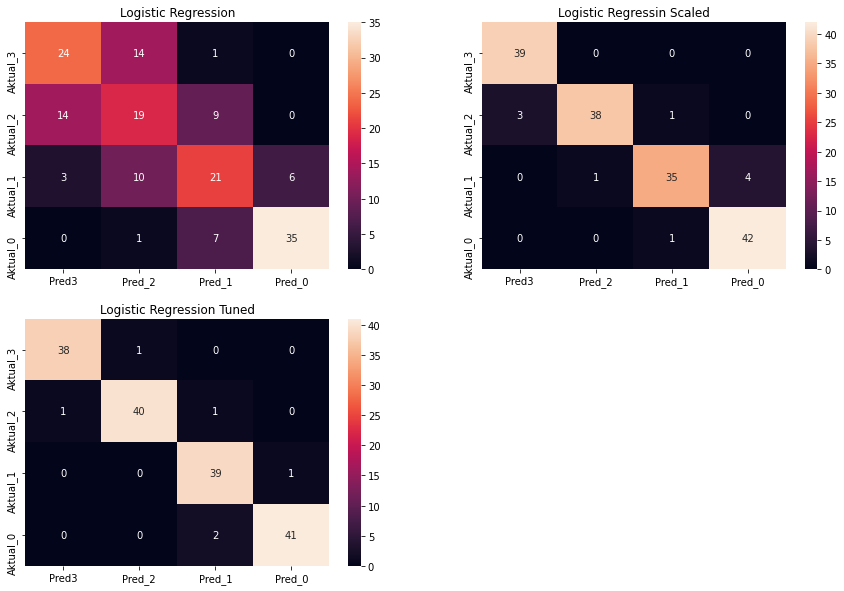

In [39]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.heatmap(df_cm_LR,annot=True)
plt.title("Logistic Regression")

plt.subplot(2,2,2)
sns.heatmap(df_cm_LR_scaled,annot=True)
plt.title("Logistic Regressin Scaled")


plt.subplot(2,2,3)
sns.heatmap(df_cm_LR_tuned,annot=True)
plt.title("Logistic Regression Tuned")

plt.show()

## KESIMPULAN

    1. Feature yang memiliki pengaruh tinggi terhadap range harga adalah :
        - Daya tahan Baterai
        - lebar dan panjang resolusi pixel
        - berat hp, semakin ringan memiliki harga yang semakin mahal
        - tebal hp, semakin tipis semakin mahal
        - kapasitas ram
        - jumlah prosesor
        - memiliki blueetooth atau tidak
    2. Algoritma yang memiliki evaluasi matrix paling bagus adalah Logistic Regression yang sudah di tuned dengan parameter seperti diatas. Dan dari confusion matrix juga memiliki tebakan salah paling sedikit yaitu apabila false negative dan false positive dijumlahkan, jumlah tebakan salahnya hanya berjumlah 6.
    
## SARAN
    1. Apabila ingin menjual hp yang bisa dihargai cukup tinggi, harus lebih berfokus pada feature-feature yang penting, seeperti daya tahan baterai lebih ditingkatkan, kapasitas ram juga, begitu juga feature lain.
    2. Mungkin performa evaluasi model masih bisa ditingkatkan apabila dilakukan riset yang lebih dalam lagi dalam melakukan feature selection, kemudian juga dilakukan tuning yang lebih baik lagi.

# Menggunakan model untuk memprediksi data test

In [40]:
test = pd.read_csv("./Data/test.csv")
test

,index,daya_baterai,bluetooth,kecepatan_clock,dual_sim,kamera_depan,four_g,memori_internal,tebal_hp,berat_hp,...,kamera_belakang_mp,px_panjang,px_lebar,kapasitas_ram,panjang_layar,lebar_layar,waktu_telfon,three_g,touch_screen,wifi
0,405,1454,1,0.5,1,1,Tidak,34,0.7,83,...,3,250,1033,3419,7,5,5,1,1,0
1,1190,1092,1,0.5,1,10,Tidak,11,0.5,167,...,14,468,571,737,14,4,11,0,1,0
2,1132,1524,1,1.8,1,0,Tidak,10,0.6,174,...,1,154,550,2678,16,5,13,1,0,1
3,731,1807,1,2.1,0,2,Tidak,49,0.8,125,...,10,337,1384,1906,17,13,13,0,1,1
4,1754,1086,1,1.7,1,0,Ya,43,0.2,111,...,1,56,1150,3285,11,5,17,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,936,805,0,0.8,0,1,Tidak,34,0.6,88,...,2,1262,1538,3647,18,11,9,1,0,1
496,1524,1162,0,1.0,0,0,Tidak,50,0.5,104,...,10,332,866,1404,10,3,15,1,1,1
497,1415,1759,1,1.4,0,10,Ya,15,0.4,101,...,13,382,1163,2107,18,5,16,1,1,0
498,1223,514,1,1.6,0,7,Ya,37,0.1,172,...,9,956,1723,3392,12,8,5,1,1,1


In [41]:
test["four_g"] = test["four_g"].map({
        "Tidak" : 0,
        "Ya" : 1
    })

In [42]:
new = test[["daya_baterai","px_panjang","px_lebar","berat_hp",
         "tebal_hp","kapasitas_ram","jumlah_prosesor","bluetooth"]]

In [43]:
new = pd.get_dummies(data=new,columns=["bluetooth"],prefix_sep="_")

In [44]:
new

,daya_baterai,px_panjang,px_lebar,berat_hp,tebal_hp,kapasitas_ram,jumlah_prosesor,bluetooth_0,bluetooth_1
0,1454,250,1033,83,0.7,3419,4,0,1
1,1092,468,571,167,0.5,737,3,0,1
2,1524,154,550,174,0.6,2678,4,0,1
3,1807,337,1384,125,0.8,1906,1,0,1
4,1086,56,1150,111,0.2,3285,6,0,1
...,...,...,...,...,...,...,...,...,...
495,805,1262,1538,88,0.6,3647,6,1,0
496,1162,332,866,104,0.5,1404,4,1,0
497,1759,382,1163,101,0.4,2107,4,0,1
498,514,956,1723,172,0.1,3392,1,0,1


In [45]:
y_pred = LR_tuned.predict(new)

In [46]:
test["price_range"] = y_pred

In [47]:
prediction = test[["index","price_range"]]

In [48]:
prediction.to_csv("./Data/danielriandy_sanber_finalproject.csv",index=False)

In [49]:
t = pd.read_csv("./Data/danielriandy_sanber_finalproject.csv")
t

,index,price_range
0,405,3
1,1190,0
2,1132,2
3,731,2
4,1754,2
...,...,...
495,936,3
496,1524,0
497,1415,2
498,1223,3
